Data la catena di markov di ordine 1 determinare la matrice stocastica associata, qual'è il rate di convergenza verso la soluzione stazionaria e qual è la matrice che descrive la distribuzione di probabilità

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ipotesi di matrice stocastica
P = np.array([[ 0.9, 0.1],
              [0.1, 0.9]])

In [3]:
# Il rate di convergenza è dato dal secondo autovalore più grande per modulo della matrice stocastica

eigvals = np.linalg.eigvals(P)
eigvals = np.sort(np.abs(eigvals))[::-1]

rate = eigvals[1]
print(f'Il rate di convergenza è: {rate:.2}')

Il rate di convergenza è: 0.8


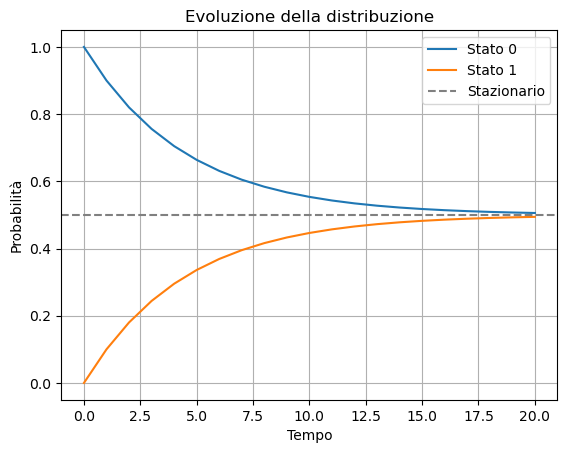

In [4]:
# Evoluzione della distribuzione di probabilitò da pi(0) a pi(t)
# Nel tempo l'evoluzione è pi(t) = pi(0)*P^t


pi0 = ([1.0, 0.0])

# Evoluzione per T passi
T = 20
pi_t = np.zeros((T+1, len(pi0)))
pi_t[0] = pi0

for t in range(1, T+1):
    pi_t[t] = pi_t[t-1] @ P # Moltiplicazione tra matrici

plt.plot(pi_t[:,0], label='Stato 0')
plt.plot(pi_t[:,1], label='Stato 1')
plt.axhline(np.linalg.matrix_power(P, 1000)[0,0], color='gray', linestyle='--', label='Stazionario')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Probabilità')
plt.title('Evoluzione della distribuzione')
plt.grid(True)
plt.show()

# Convergono entrambi allo stesso valore (0.5 perchè la loro somma deve fare 1) perchè la matrice è simmetrica

In [5]:
from scipy.linalg import eig
# La funzione stazionaria soddisfa anche P.T pi.T = pi.T dove con .T indico la trasposta, ovviamente soddisfa anche l'uguaglianza senza .T


# Calcolo dell'autovettore stazionario
w, v = eig(P.T) # w contiene gli autovalori e v gli autovettori della trasposta di P
stationary = v[:, np.isclose(w, 1)] # Prende l'autovettore con autovalore 1
stationary = stationary[:,0].real
stationary /= stationary.sum()  # normalizzazione

print("Distribuzione stazionaria:", stationary)

# Come ci si aspettava è 0.5 entrambi
# Se si cambia la matrice iniziale chiaramente cambiano anche questi valori

Distribuzione stazionaria: [0.5 0.5]
